# Time Series Demo

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr

from mgcpy.independence_tests.dcorrx import DCorrX
from mgcpy.independence_tests.mgcx import MGCX

## Simulate time series.
Let $\epsilon_t$ and $\eta_t$ be i.i.d. standard normally distributed.

Independent AR(1):
$$\begin{bmatrix}
    X_t\\
    Y_t
    \end{bmatrix}
    =
    \begin{bmatrix}
    0.5 & 0\\
    0 & 0.5
    \end{bmatrix}
    \begin{bmatrix}
    X_{t-1}\\
    Y_{t-1}
    \end{bmatrix}
    +
    \begin{bmatrix}
    \epsilon_t\\
    \eta_t
    \end{bmatrix}$$

In [8]:
def indep_ar1(n, phi = 0.5, sigma2 = 1.0):
    # X_t and Y_t are univarite AR(1) with phi = 0.5 for both series.
    # Noise follows N(0, sigma2).
    
    # Innovations.
    epsilons = np.random.normal(0.0, sigma2, n)
    etas = np.random.normal(0.0, sigma2, n)
    
    X = np.zeros(n)
    Y = np.zeros(n)
    X[0] = epsilons[0]
    Y[0] = etas[0]
    
    # AR(1) process.
    for t in range(1,n):
        X[t] = phi*X[t-1] + epsilons[t]
        Y[t] = phi*Y[t-1] + etas[t]
        
    return X, Y

Crosscorrelated AR(1):
$$\begin{bmatrix}
    X_t\\
    Y_t
    \end{bmatrix}
    =
    \begin{bmatrix}
    0 & 0.5\\
    0.5 & 0
    \end{bmatrix}
    \begin{bmatrix}
    X_{t-1}\\
    Y_{t-1}
    \end{bmatrix}
    +
    \begin{bmatrix}
    \epsilon_t\\
    \eta_t
    \end{bmatrix}$$

In [5]:
def cross_corr_ar1(n, phi = 0.5, sigma2 = 1.0):
    # X_t and Y_t are together a bivarite AR(1) with Phi = [0 0.5; 0.5 0].
    # Innovations follow N(0, sigma2).
    
    # Innovations.
    epsilons = np.random.normal(0.0, sigma2, n)
    etas = np.random.normal(0.0, sigma2, n)
    
    X = np.zeros(n)
    Y = np.zeros(n)
    X[0] = epsilons[0]
    Y[0] = etas[0]

    for t in range(1,n):
        X[t] = phi*Y[t-1] + epsilons[t]
        Y[t] = phi*X[t-1] + etas[t]
        
    return X, Y

Nonlinearly related at lag 1:
$$\begin{bmatrix}
    X_t\\
    Y_t
    \end{bmatrix}
    =
    \begin{bmatrix}
    \epsilon_t Y_{t-1}\\
    \eta_t
    \end{bmatrix}$$

In [75]:
def nonlinear_lag1(n, phi = 1, sigma2 = 1):
    # X_t and Y_t are together a bivarite nonlinear process.
    # Innovations follow N(0, sigma2).
    
    # Innovations.
    epsilons = np.random.normal(0.0, sigma2, n)
    etas = np.random.normal(0.0, sigma2, n)
    
    X = np.zeros(n)
    Y = np.zeros(n)
    Y[0] = etas[0]
 
    for t in range(1,n):
        X[t] = phi*epsilons[t]*Y[t-1]
        Y[t] = etas[t]
        
    return X, Y

## Plot time series.

In [86]:
def plot_ts(X, Y, title, xlab = "X_t", ylab = "Y_t"):
    n = X.shape[0]
    t = range(1, n + 1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
    fig.suptitle(title)
    plt.rcParams.update({'font.size': 15})
    
    ax1.plot(t, X)
    ax1.plot(t, Y)
    ax1.legend(['X_t', 'Y_t'], loc = 'upper left', prop={'size': 12})
    ax1.set_xlabel("t")
    
    ax2.scatter(X,Y, color="black") 
    ax2.set_ylabel(ylab)
    ax2.set_xlabel(xlab)

## Explore with DCorr-X and MGC-X.

In [83]:
def compute_dcorrx(X, Y, max_lag):
    dcorrx = DCorrX(max_lag = max_lag, which_test = 'unbiased')
    dcorrx_statistic, metadata = dcorrx.test_statistic(X, Y)
    p_value, _ = dcorrx.p_value(X, Y)
    optimal_lag = metadata['optimal_lag']

    print("DCorrX test statistic:", dcorrx_statistic)
    print("P Value:", p_value)
    print("Optimal Lag:", optimal_lag)

def compute_mgcx(X, Y, max_lag):
    mgcx = MGCX(max_lag = max_lag)
    mgcx_statistic, metadata = mgcx.test_statistic(X, Y)
    p_value, _ = mgcx.p_value(X, Y)
    optimal_lag = metadata['optimal_lag']
    optimal_scale = metadata['optimal_scale']
    
    print("MGCX test statistic:", mgcx_statistic)
    print("P Value:", p_value)
    print("Optimal Lag:", optimal_lag)
    print("Optimal Scale:", optimal_scale)

DCorrX test statistic: 0.0
P Value: 0.463
Optimal Lag: 0
MGCX test statistic: 0.0
P Value: 0.455
Optimal Lag: 0
Optimal Scale: [40, 40]


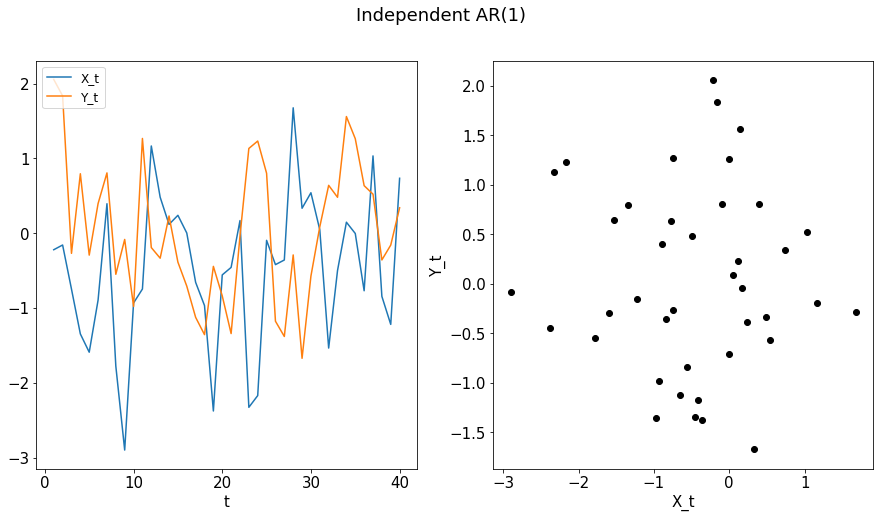

In [85]:
n = 40
max_lag = 0

X, Y = indep_ar1(n)
plot_ts(X, Y, "Independent AR(1)")
compute_dcorrx(X, Y, max_lag)
compute_mgcx(X, Y, max_lag) 

In the crosscorrelated time series, the linear dependence will not be apparent at lag 0, but will be at lag 1.

DCorrX test statistic: 0.0
P Value: 0.513
Optimal Lag: 0
MGCX test statistic: 0.0
P Value: 0.495
Optimal Lag: 0
Optimal Scale: [30, 30]


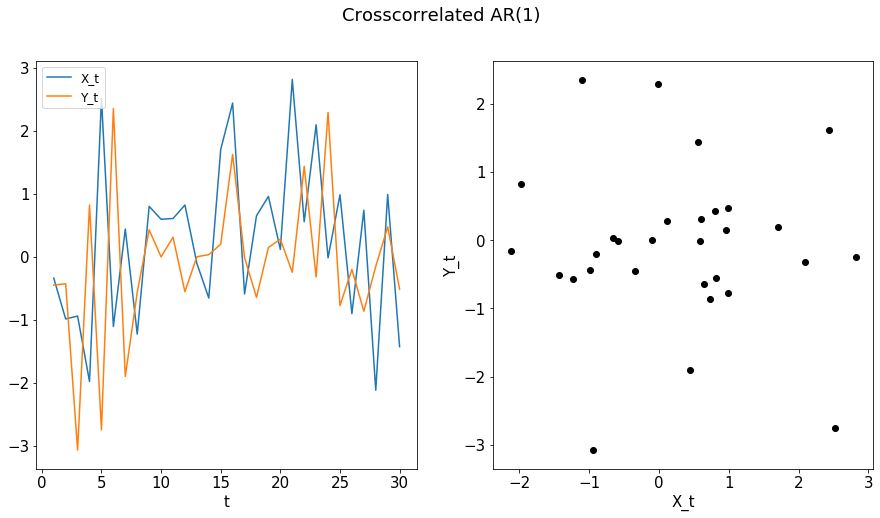

In [87]:
n = 40
max_lag = 0

X, Y = cross_corr_ar1(n)
plot_ts(X, Y, "Crosscorrelated AR(1)")
compute_dcorrx(X, Y, max_lag)
compute_mgcx(X, Y, max_lag)

DCorrX test statistic: 0.23744844325805894
P Value: 0.015
Optimal Lag: 1
MGCX test statistic: 0.23759452205381915
P Value: 0.055
Optimal Lag: 1
Optimal Scale: [29, 29]


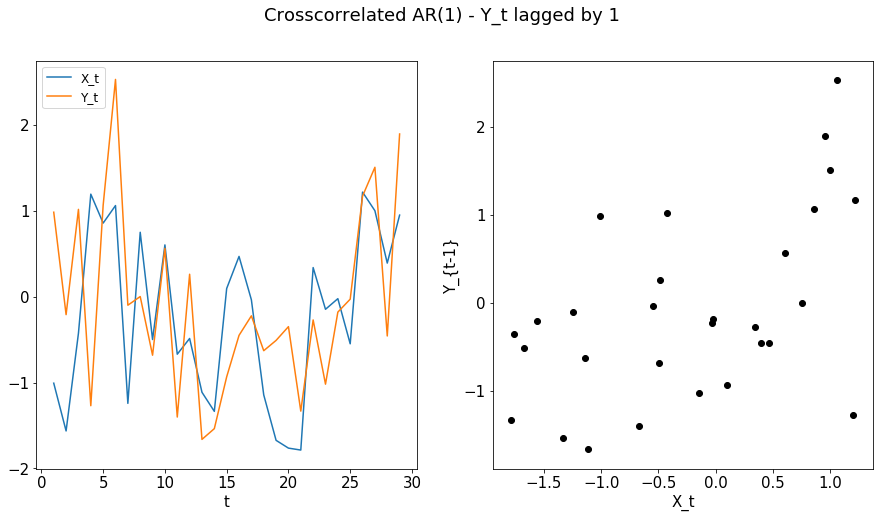

In [88]:
max_lag = 1

X, Y = cross_corr_ar1(n)
plot_ts(X[1:n], Y[0:(n-1)], "Crosscorrelated AR(1) - Y_t lagged by 1", ylab = "Y_{t-1}")
compute_dcorrx(X, Y, max_lag)
compute_mgcx(X, Y, max_lag)

The final example is a nonlinearly related series, for which the Pearson's correlation is insufficient.

In [98]:
X, Y = nonlinear_lag1(n)

print("Pearson's Correlation at lag 0: " + str(pearsonr(X,Y)[0]))
print("Pearson's Correlation at lag 1: " + str(pearsonr(X[1:n],Y[0:(n-1)])[0]))

Pearson's Correlation at lag 0: 0.2333331353017132
Pearson's Correlation at lag 1: -0.21928458494833472


DCorrX test statistic: 0.25180325817654037
P Value: 0.005
Optimal Lag: 1
MGCX test statistic: 0.3175566726475339
P Value: 0.02
Optimal Lag: 1
Optimal Scale: [16, 25]


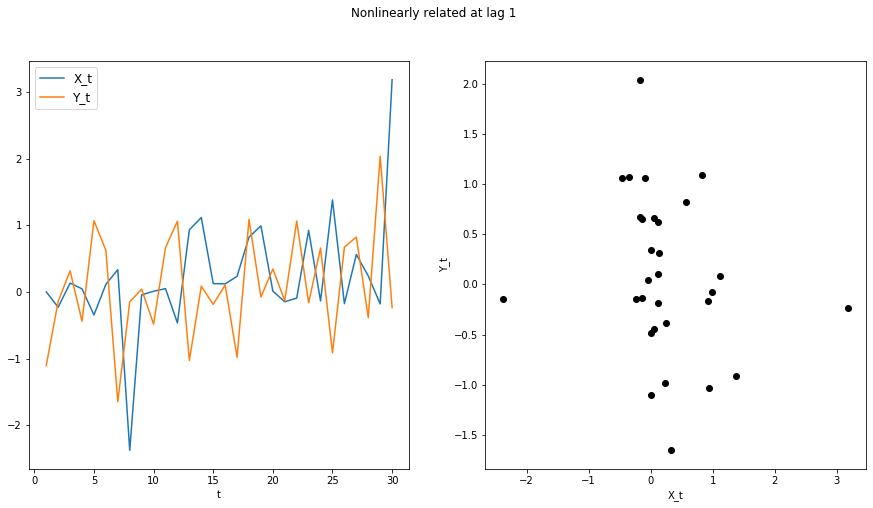

In [96]:
plot_ts(X, Y, "Nonlinearly related at lag 1")
compute_dcorrx(X, Y, max_lag)
compute_mgcx(X, Y, max_lag)